## Anisotropy Modeling  

Walkaway VSPs are typically used to measure VTI anisotropy

Moving the source progressively farther from the wellhead allows measuring  
travel time for steadily increasing angles of incidence at the receivers.  

Techniques have been developed to calculate horizontal and vertical slownesses from these measured times. These slownesses can be compared to modeled slownesses to get an estimate of anisotropy.  

This notebook generates modeled ansiotropic and isotropic responses which can be compared to  
the measured calculations

In [2]:
# Import the anisotropy package
# Make sure anisomodel.py exists in the procvsp folder

from procvsp import anisomodel

## VTI Parameterization  

The vertical P velocity ($Vpz$) and vertical Sv velocity ($Vsz$)  
are user inputs  

Thomsen's Epsilon $(\epsilon)$ and Delta $(\delta)$ are user inputs

From epsilon and delta we calculate Tsvankin's $\eta$ and $\sigma$

$    \eta = (\epsilon-\delta)/(1+2*\delta)$    
$    \sigma = (Vpz/Vsz)^2*(\epsilon-\delta)$  

See Alkhalifah and Tsvankin, 1995.

The horizontal (Vpx, Vsx) and near offset (Vpn and Vsn) velocities  
can be calculated:

$    Vpx = Vpz*\sqrt{(1+ 2*\epsilon)}$  
$    Vpn = Vpz*\sqrt{(1+ 2*\delta)}$  
$    Vsx = Vsz$  (for this notebook)  
$    Vsn = Vsz*\sqrt{(1+ 2*\sigma)}$



## Phase Velocity with Anisotropy  

Exact phase velocity in terms of velocity parameters, and as a function of $\theta$.  
$\theta$ is the wavefront propagation direction:  


<img src="nb_images/angles.jpg" width="400" height="400" align="left" />  
<br clear="left"/>   
<br>
<br>    
$ 2Vp^2 = Vpx^2*\sin(\theta)^2+Vpz^2*\cos(\theta)^2 +Vsz^2+
\sqrt{(( Vpx^2-Vsz^2)*\sin(\theta)^2 +(Vpz^2-Vsz^2)*\cos(\theta)^2)^2 +
                 (Vpz^2-Vsz^2)*(Vpn^2-Vpx^2)*(\sin(2*\theta))^2} $  
                 
For the shear velocity (Sv), the square root term is subtracted:  

$ 2Vs^2 = Vpx^2*\sin(\theta)^2+Vpz^2*\cos(\theta)^2 +Vsz^2-
\sqrt{(( Vpx^2-Vsz^2)*\sin(\theta)^2 +(Vpz^2-Vsz^2)*\cos(\theta)^2)^2 +
                 (Vpz^2-Vsz^2)*(Vpn^2-Vpx^2)*(\sin(2*\theta))^2} $  
                 

  
We calculate Vp and Vs for a range of $\theta$ 



## Slowness Modeling

Once the P and Sv phase velocity is calculated, the horizontal (xp) and  
vertical (zp) slowness components can be calculated for all $\theta$ angles  

   $Slowp = 1/Vp$  
   $Slowxp = Slowp*\sin(\theta)$  
   $Slowzp = Slowp*\cos(\theta)$

   $Slows = 1/Vs$  
   $Slowxs = Slows*\sin(\theta)$  
   $Slowzs = Slows*\cos(\theta)$


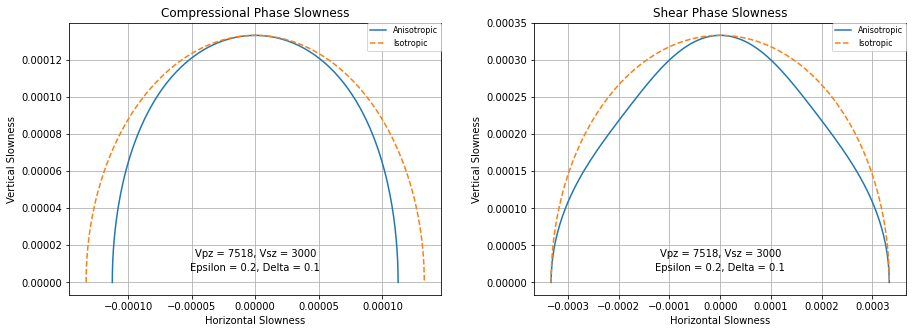

In [3]:
# Calculate phase velocities

Vpz= 7518
Vsz= 3000
epsilon = .2
delta = .1
dep = 3000
xmax= 20000
savepng='y'

anisomodel.aniso_phase(Vpz, Vsz, epsilon, delta, savepng)

## Slowness Components from Measured (Real) Data  

Horizontal and vertical slowness for compressional waves can be calculated from walkaway  
VSP arrival times and geometry.

Colin Sayer shows in 'Determination of anisotropic velocity models  
from walkaway VSP data acquired in the presence of dip' (Geophysics, 1997) how to  
calculate the slownesses. 

$dx_1$ : horizontal distance between shots  
$dx_3$ : vertical distance between receivers (aka $dz$)  
$dt$ :  difference in arrival time between recevers for each source (Sz)  
&emsp;&emsp;difference in arrival time between sources for a receiver (Sx)  
    
<img src="nb_images/Sayers_Sx_Sz.png" width="400" height="400" align="left" />  
<br clear="left"/>   
<br>
<br>    

At each source the vertical slowness is calculated from the arrival times and depths across several receivers. The receivers should be in the zone of interest.  

At each receiver the horizontal slowness is calculated from the arrival times and depths across several sources. The receiver used should be in the zone of interest.  

There are several inversion schemes to automate the process of matching the measured  
and modeled data to get the correct epsilon and delta values.  

A finite difference synthetic was generated using 20 walkaway VSP source positions and 25 receivers.  
The model has $\epsilon = .25$ and $\delta = .02$ in the layer that contains the receivers.  

By picking the p-wave arrival times, calculating slownesses and crossplotting,  
we should be able to confirm $\epsilon$ and $\delta$ by comparing to the modeled slownesses.  

The thick red line indicates the receiver locations in the model below.

<img src="nb_images\Model_aniso1.png" width="400" height="400" align="left" />  
<br clear="left"/>   
<br>
<br>  

The picture below shows how we calculate $Sx$ (left) and $Sz$ (right)  

<img src="nb_images\wvsp_aniso2.png" width="400" height="400" align="left" />  
<br clear="left"/>   
<br>
<br>    



Input text sorted by shot 
 traces per shot gather : 25


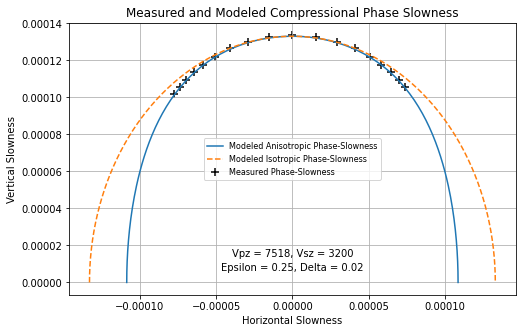

In [4]:
# Get a structured ascii file with times and geometries from a synthetic 
# walkaway VSP    
filename_tzoff = ('C:\\Users\\acampbell45\\Documents\\Python_Scripts'
        '\\Synthetic_data\\data'
        '\\WVSP_tzx_eps25_del02.csv')

timeunit = 's' # ms or s for time units

Vpz= 7518 # vertical P velocity at receiver array
Vsz= 3200 # vertical S velocity at receiver array
epsilon = .25
delta = .02
savepng='y'

anisomodel.aniso_phase_calc(filename_tzoff, timeunit,Vpz, Vsz, epsilon, delta,savepng )


## Slowness Polarization Modeling  

The direct arriving P-wave polarization angle can be measured from the data  
or estimated in wave separation techniques. Polarization angles are the measured counterpart  
to the phase angles used in our calculations.

From the phase velocity modeling we can get the modelled phase polarization angle:

$𝑆=1/𝑉𝑝$ &emsp;$ 𝑆=\sqrt{(𝑆𝑥+𝑆𝑧)}$&emsp;$\theta = \arctan(\sqrt{(Sx/Sz)})$&emsp;(Miller and Spencer, 1995)

We can cross-plot modelled and measured phase angles and their associated vertical slowness components to see if  
they are indicative of anisotropy.

It has been shown in the literature that adding polarization angle data may increase  
confidence in anisotropy estimates from walkaway VSP data  


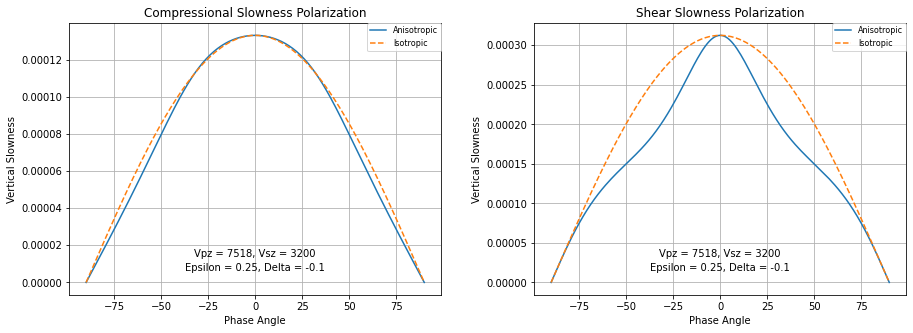

In [5]:
epsilon = .25
delta = -.1
savepng='y'
anisomodel.aniso_slowpol(Vpz, Vsz, epsilon, delta,savepng)

## Wavefront Modelling  

To model wavefronts at a constant time we need to generate group velocity and group angle  

The relationships are too complicated to replicate in this comment section,  
Look at the code!!



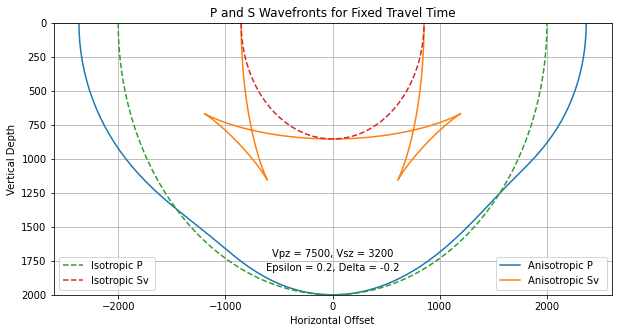

In [6]:
savepng = 'n'
Vpz= 7500
Vsz= 3200
epsilon = .2
delta =-.2
depth = 1000

VpG = anisomodel.wavefronts(Vpz, Vsz, epsilon, delta,depth,savepng)